## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats
import math
import warnings

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [5]:
def sample_cards(N, n, k, replacement):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace = replacement)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [10]:
cards = sample_cards(100, 6, 3, replacement = False)
cards

array([[37, 70, 89],
       [ 1, 32, 92],
       [11, 68, 86],
       [ 7, 52, 75],
       [21, 58, 71],
       [17, 51, 85]])

and access the cards of each player with 

In [11]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([37, 70, 89]), array([ 1, 32, 92]))

The lowest card in the game is

In [12]:
np.min(cards)

1

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

In [6]:
num_samples = 10000000
Num_cards = 100

def min_card_dist(num_players, level):
    output = []
    for n in range(num_samples): 
            sample = sample_cards(Num_cards, num_players, level, replacement = False)
            lowest = np.min(sample)
            output.append(lowest)

    arr = np.array(output)
    plt.hist(arr, bins=100);
    plt.xlabel("Lowest card")
    plt.ylabel("Occurences")
    plt.title("Dist. of min card for " + str(num_players) + " players at level " + str(level))

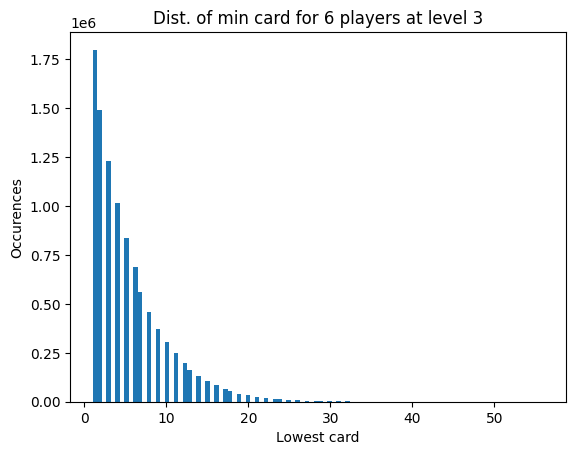

In [16]:
min_card_dist(num_players = 6, level = 3)

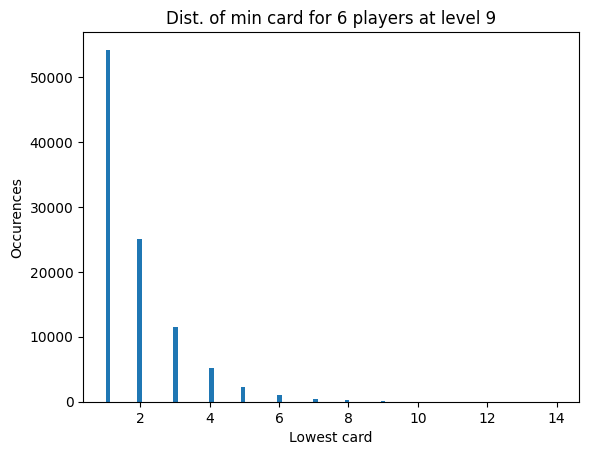

In [23]:
min_card_dist(num_players = 6, level = 9)

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

In [7]:
def largest_consecutive_gap(arr):
    num_players = len(arr)
    sorted_a = np.sort(arr)
    gap = 0
    for i in range(num_players):
        if sorted_a[i] - sorted_a[i-1] > gap:
            gap = sorted_a[i] - sorted_a[i-1]
            
    return gap



def largest_consecutive_gap_between_players(arr):
    num_players, level = arr.shape
    max_index = ((num_players-1)*level) - 1
    output = []
    gap = 0
    for i in range(num_players):
        my_cards = np.sort(arr[i].flatten())
        others_cards = np.sort(np.delete(arr, i, 0).flatten())
        for card in my_cards:
            res = np.searchsorted(others_cards, card)
            if res < max_index:
                temp = others_cards[res] - card
            else:
                temp = others_cards[max_index] - card
                
            if temp > gap:
                gap = temp
                        
    return gap

In [8]:
num_samples = 100000
Num_cards = 100

def largest_consecutive_gap_dist(num_players, level):
    output = []
    for i in range(num_samples): 
            sample = sample_cards(Num_cards, num_players, level, replacement = False)
            largest_gap = largest_consecutive_gap(sample.flatten())
            output.append(largest_gap)
        
    arr = np.array(output)
    plt.hist(arr, bins=100)
    plt.xlabel("Largest Gap")
    plt.ylabel("Occurences")
    plt.title("Dist. of largest consectuive gap for " + str(num_players) + " players at level " + str(level));
    

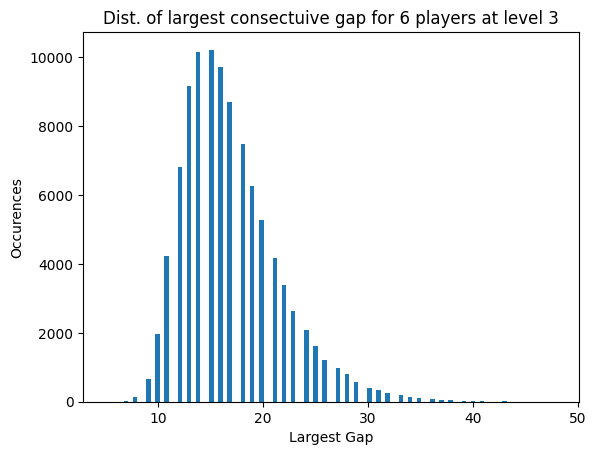

In [32]:
largest_consecutive_gap_dist(num_players = 6, level = 3)

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [9]:
num_samples = 100000
Num_cards = 100
num_players = 6
level = 3

def largest_consecutive_gap_between_players_dist(num_players, level):
    output_between = []
    for i in range(num_samples): 
            sample = sample_cards(Num_cards, num_players, level, replacement = False)
            lcg_between = largest_consecutive_gap_between_players(sample)
            output_between.append(lcg_between)

    arr_between = np.array(output_between)
    plt.hist(arr_between, bins=100)
    plt.xlabel("Largest Gap")
    plt.ylabel("Occurences")
    plt.title("Dist. of largest consecutive gap between " + str(num_players) + " players at level " + str(level));


    
def compare_dists(num_players, level, plot):
    output_all = []
    output_between = []

    for i in range(num_samples): 
            sample = sample_cards(Num_cards, num_players, level, replacement = False)
            lcg_between = largest_consecutive_gap_between_players(sample)
            lcg_all = largest_consecutive_gap(sample.flatten())
            output_all.append(lcg_all)
            output_between.append(lcg_between)
    

    arr_all = np.array(output_all)
    arr_between = np.array(output_between)
    if plot:
        plt.hist(arr_all, bins=100)
        plt.hist(arr_between, bins=100)
        plt.xlabel("Largest Gap")
        plt.ylabel("Occurences")
        plt.title("Dist. of largest consecutive gap both total and between " + str(num_players) + " players at level " + str(level));

    mu_all = np.average(arr_all)
    mu_between = np.average(arr_between)
    return mu_all, mu_between


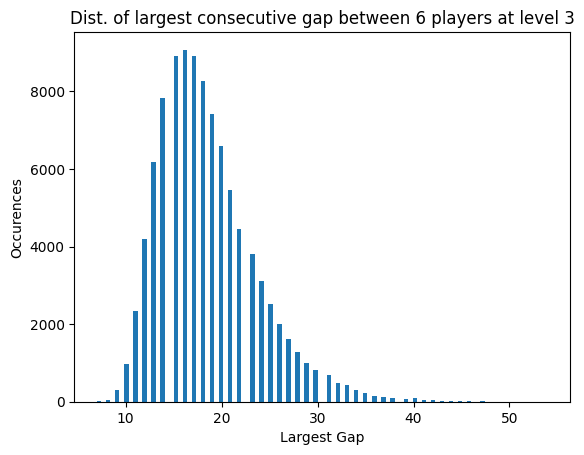

In [38]:
largest_consecutive_gap_between_players_dist(num_players = 6, level = 3)

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

The difference in means for 6 players is 1.5916400000000017


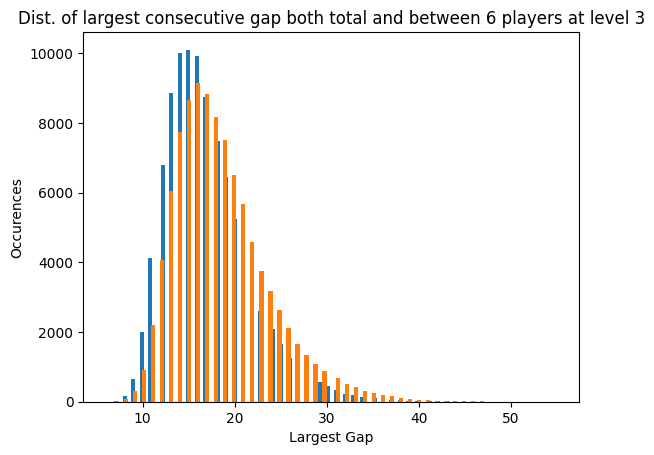

In [39]:
mu_all, mu_between = compare_dists(num_players = 6, level = 3, plot = True)
print("The difference in means for " +  str(num_players) + " players is " + str(mu_between-mu_all))

In [40]:
for num_players in range(2, 10):
    mu_all, mu_between = compare_dists(num_players = num_players, level = 3, plot = False)
    print("The difference in means for " +  str(num_players) + " players is " + str(mu_between-mu_all))

'''The difference in means is a decreasing function of the number of players. This is what we would expect.'''

The difference in means for 2 players is 7.207499999999996
The difference in means for 3 players is 4.365220000000001
The difference in means for 4 players is 2.894389999999998
The difference in means for 5 players is 2.0568500000000007
The difference in means for 6 players is 1.5601999999999983
The difference in means for 7 players is 1.2269600000000018
The difference in means for 8 players is 0.9941899999999997
The difference in means for 9 players is 0.8257099999999991


'The difference in means is a decreasing function of the number of players. This is what we would expect.'

In [42]:
for level in range(2, 10):
    mu_all, mu_between = compare_dists(num_players = 6, level = level, plot = False)
    print("The difference in means for level " +  str(level) + " is " + str(mu_between-mu_all))

'''The difference in means is a decreasing function of the level, after level 2.'''

The difference in means for level 2 is 1.3586799999999997
The difference in means for level 3 is 1.5668700000000015
The difference in means for level 4 is 1.543709999999999
The difference in means for level 5 is 1.4680300000000006
The difference in means for level 6 is 1.40944
The difference in means for level 7 is 1.3345900000000004
The difference in means for level 8 is 1.2697500000000002
The difference in means for level 9 is 1.21584


'The difference in means is a decreasing function of the level, after level 2.'

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

In [10]:
def sample_game(N, n, k, replacement):
    cards = sample_cards(N, n, k, replacement)
    return cards

def binom_from_game(p, Num_cards, num_players, level, replacement):
    x = sample_game(Num_cards, num_players, level, replacement).flatten()
    successes = [1 if n < p*Num_cards else 0 for n in x].count(1)
    return successes



In [49]:
def sim_binom_equivalence(Num_cards, num_players, level, replacement):
    n_sims = 100000
    record = {}
    p = 0.75
    for i in range(n_sims):
        successes = binom_from_game(p, Num_cards, num_players, level, replacement)
        record[i] = successes

    record_df = pd.DataFrame.from_dict(record, orient='index', columns=["Sample"])
    
    warnings.filterwarnings('ignore')
    size = 1000
    sns.kdeplot(record_df, bw_adjust=3, label = "Sample")
    sns.kdeplot(np.random.binomial(num_players*level, p, size), color = 'green', label = "NP Binom ecdf")
    sns.kdeplot(scipy.stats.binom.rvs(num_players*level, p, size = size), color = 'red', label = "Scipy Binom ecdf");
    plt.legend();
    

In [48]:
sim_binom_equivalence(Num_cards = 100, num_players = 6, level = 3, replacement = False)

NameError: name 'sim_binom_equivalence' is not defined

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

In [39]:
def sim_beta_equivalence(Num_cards, num_players, level, replacement =  False):
    n_sims = 100000
    record = {}
    for i in range(n_sims):
        cards = sample_game(Num_cards, num_players, level, replacement = replacement).flatten()
        min_card = min(cards)
        record[i] = min_card/Num_cards

    record_df = pd.DataFrame.from_dict(record, orient='index', columns = ["Sample"])
    
    warnings.simplefilter('ignore')
    size=10000
    sns.kdeplot(record_df, color = "blue", bw_adjust = 10*(num_players*level)/Num_cards, label = "Sample", clip = [0.0, 1.0])
    sns.distplot(np.random.beta(1, num_players*level, size), color = 'green', label= "NP Beta ecdf", kde_kws = {'clip': (0.0, 1.0)})
    plt.legend();

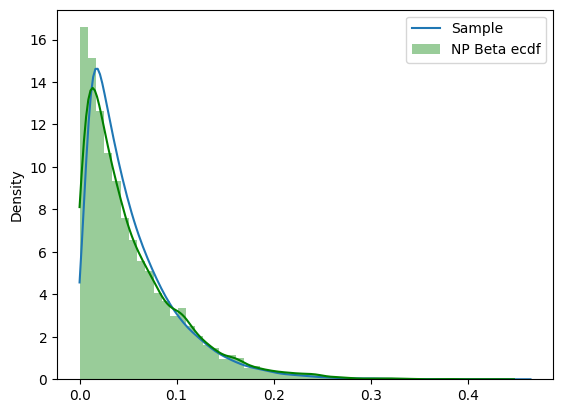

In [46]:
sim_beta_equivalence(Num_cards = 100, num_players = 6, level = 3)
# Sorry about the innacuracy of the seaborn dist. plot, the hist part is more accurate.
# The kernel density estimation seemed to really struggle being bound by 0.

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

In [43]:
def sim_exp_equivalence(Num_cards, num_players, level, replacement = False):
    n_sims = 100000
    record = {}
    for i in range(n_sims):
        cards = sample_game(Num_cards, num_players, level, replacement = replacement).flatten()
        min_card = min(cards)
        record[i] = -math.log(1-min_card/Num_cards)


    record_df = pd.DataFrame.from_dict(record, orient='index', columns =["Sample"])
    warnings.simplefilter('ignore')
    size = 10000
    sns.kdeplot(record_df, color = "blue", bw_adjust = 10*(num_players*level)/Num_cards, label = "Sample", clip =[0,200])
    sns.distplot(np.random.exponential(scale=1/(num_players*level), size=size), color='green', label = "NP Exp ecdf", kde_kws={'clip': (0.0, 200)})
    plt.legend();

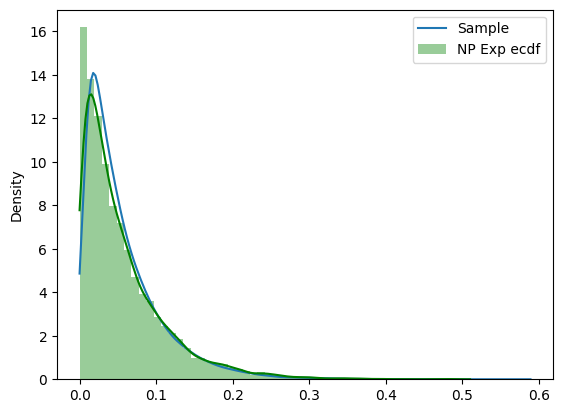

In [44]:
sim_exp_equivalence(Num_cards = 100, num_players = 6, level = 3)
# Again, sorry about the innacuracy of the seaborn dist. plot.

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

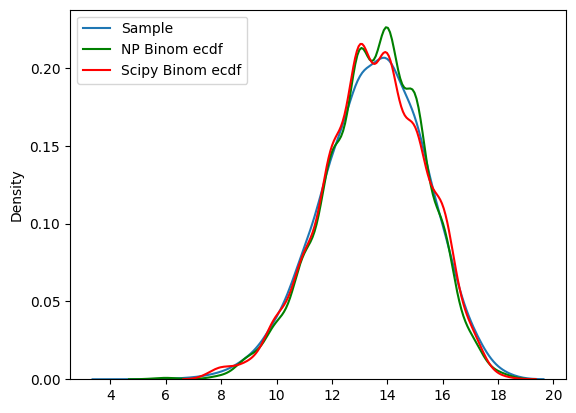

In [56]:
sim_binom_equivalence(Num_cards = 10000, num_players = 6, level = 3, replacement = False)

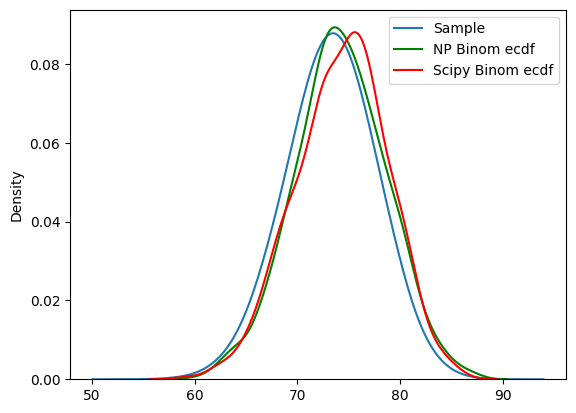

In [51]:
sim_binom_equivalence(Num_cards = 100, num_players = 9, level = 11, replacement = True)

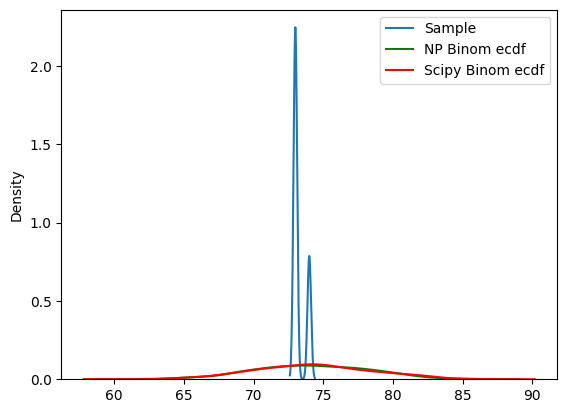

In [50]:
sim_binom_equivalence(Num_cards = 100, num_players = 9, level = 11, replacement = False)

Replacement is important when n*k is close to N, as otherwise the approximation to binomial breaks down.

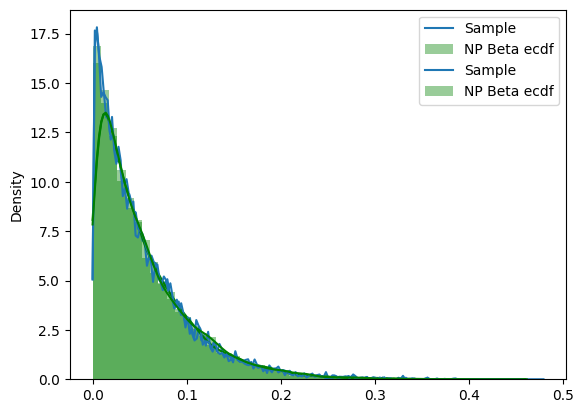

In [55]:
sim_beta_equivalence(Num_cards = 10000, num_players = 6, level = 3, replacement = False)

In [ ]:
sim_beta_equivalence(Num_cards = 10000, num_players = 6, level = 3, replacement = True)

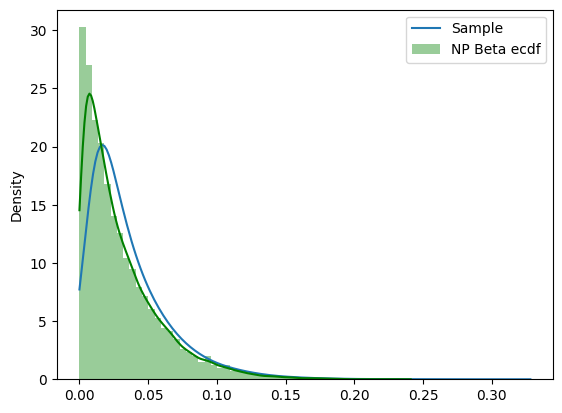

In [58]:
sim_beta_equivalence(Num_cards = 100, num_players = 3, level = 11, replacement = True)

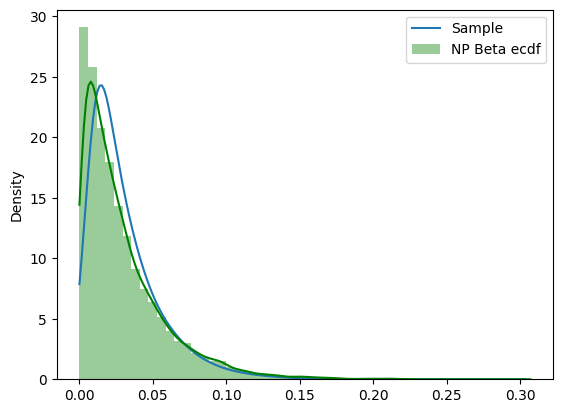

In [59]:
sim_beta_equivalence(Num_cards = 100, num_players = 3, level = 11, replacement = False)

When N >> nk, replacement is irrelevant in the beta case also. However, when nk and N are close, sampling without replacement is important to the Beta approximation.

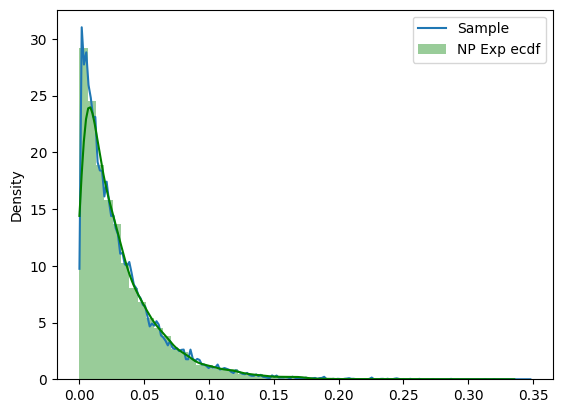

In [61]:
sim_exp_equivalence(Num_cards = 10000, num_players = 3, level = 11, replacement = True)

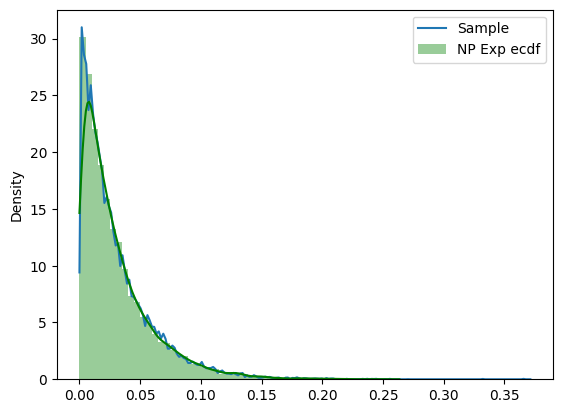

In [62]:
sim_exp_equivalence(Num_cards = 10000, num_players = 3, level = 11, replacement = False)

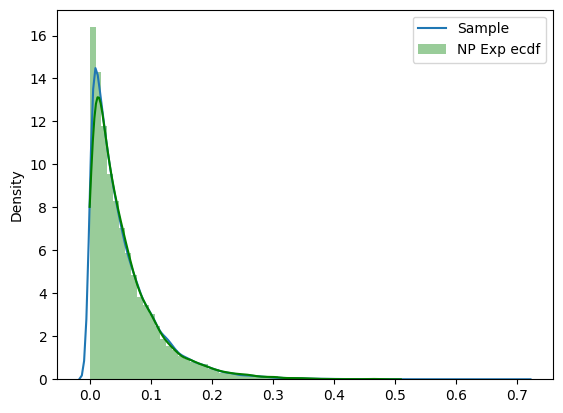

In [78]:
sim_exp_equivalence(Num_cards = 100, num_players = 3, level = 11, replacement = True)

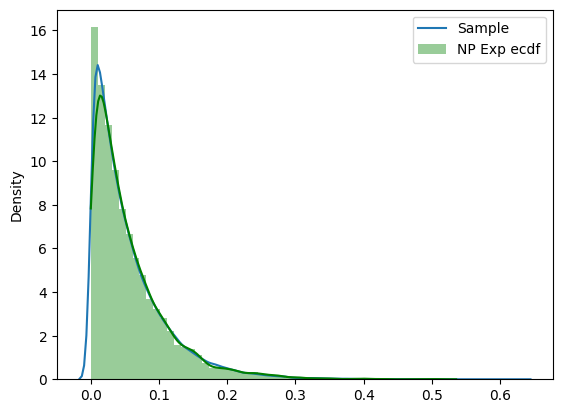

In [79]:
sim_exp_equivalence(Num_cards = 100, num_players = 3, level = 11, replacement = False)

As we can see, our transformations in the exponential approximation mean we are impervious to the ratio of nk and N, and replacement. 

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Phudish (Tam)
- Member No2: 
- Member No3: